# <center>实验三 贷款违约预测</center>
<center>金融学（互联网+金融）1602班 沈吉梅 20160756</center>

In [1]:
import numpy as np
import pandas as pd
import copy
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn import preprocessing

In [2]:
df = pd.read_csv("train_v2.csv")

C:\Users\Jimei\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB


In [5]:
len(df)

105471

In [6]:
df.isna().sum()

id         0
f1         0
f2         0
f3         0
f4         0
f5         0
f6         0
f7       182
f8       101
f9         0
f10        0
f13        0
f14      100
f15       48
f16        0
f17      159
f18       23
f19       23
f20      460
f21     1840
f22     1698
f23      698
f24        0
f25        0
f26      698
f27        0
f28        0
f29        0
f30        0
f31      698
        ... 
f750     853
f751    1458
f752       2
f753       2
f754       2
f755       2
f756     233
f757     800
f758     800
f759     800
f760    1334
f761     158
f762     158
f763    1840
f764       0
f765       1
f766       0
f767       0
f768       0
f769       0
f770       0
f771       0
f772       0
f773       0
f774    1064
f775    1525
f776       0
f777       0
f778       0
loss       0
Length: 771, dtype: int64

In [7]:
cols = list(df)
for i in range(1,779):
    if 'f' + str(i) not in cols:
        print('f' + str(i) , u'居然是不存在的？！')

f11 居然是不存在的？！
f12 居然是不存在的？！
f462 居然是不存在的？！
f463 居然是不存在的？！
f473 居然是不存在的？！
f474 居然是不存在的？！
f602 居然是不存在的？！
f603 居然是不存在的？！
f605 居然是不存在的？！


In [8]:
df_missing_values = df.isnull().sum()
df_missing_values = df_missing_values[df_missing_values > 0]
df_cols_missing_values = list(df_missing_values.index)

In [9]:
# df_cols_missing_values

In [10]:
for i in df_cols_missing_values: 
    df[i] = df[i].replace('NA', '0')
    df.loc[df[i].isnull(), i] = df[i].median()  

In [11]:
len(df)

105471

In [12]:
df['loss'].isnull().any()

False

In [13]:
X = df.iloc[:, df.columns != 'loss']
y = df.iloc[:, df.columns == 'loss']

In [14]:
X.set_index('id',inplace=True)

C:\Users\Jimei\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jimei\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  import sys
C:\Users\Jimei\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


[1.24528122e+02 1.12073268e+02 5.57832545e+01 4.39190987e+01
 4.18016929e+01 2.60966993e+01 1.65555076e+01 1.43063780e+01
 1.33898231e+01 1.22847665e+01 1.05124733e+01 1.00868270e+01
 7.69265602e+00 7.43971287e+00 6.95892863e+00 6.50395789e+00
 5.82830837e+00 5.62487044e+00 5.45697504e+00 5.40091542e+00
 5.21856570e+00 4.86202131e+00 4.76912569e+00 4.73450402e+00
 4.58042391e+00 4.41983553e+00 4.15877157e+00 4.01139317e+00
 3.87360136e+00 3.39544154e+00 3.24721499e+00 3.22383651e+00
 3.18598969e+00 3.11295960e+00 2.90212301e+00 2.85811523e+00
 2.65675983e+00 2.59742932e+00 2.57391480e+00 2.52959323e+00
 2.44477423e+00 2.37105938e+00 2.34017797e+00 2.23201101e+00
 2.17620423e+00 2.11976007e+00 2.09340382e+00 2.07494975e+00
 2.01729969e+00 1.98359225e+00 1.93897209e+00 1.90782605e+00
 1.87134801e+00 1.83463915e+00 1.80506231e+00 1.75872871e+00
 1.72174385e+00 1.67012348e+00 1.66267131e+00 1.60333167e+00
 1.59078199e+00 1.55613238e+00 1.53033450e+00 1.50414409e+00
 1.49128506e+00 1.470418

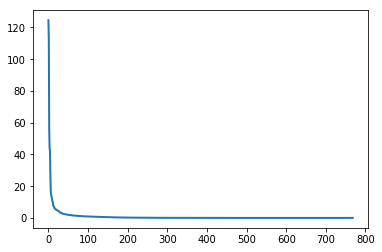

In [15]:
cols_category = ['f776', 'f777']
cols_not_category = [i for i in list(X) if i not in cols_category]
# Standardization: mean removal and variance scaling
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(X[cols_not_category])
#scaler.mean_
#scaler.scale_
X_scaled = scaler.transform(X[cols_not_category])
# Add the categorical columns
X_scaled = np.append(X_scaled, X[cols_category].as_matrix(), axis=1)
# Try PCA
pca = PCA()
pca.fit(X_scaled)
print(pca.explained_variance_)
plt.plot(pca.explained_variance_, linewidth=2)
pca_reduc = PCA(n_components=50)
X_reduced = pca_reduc.fit(X_scaled).transform(X_scaled)

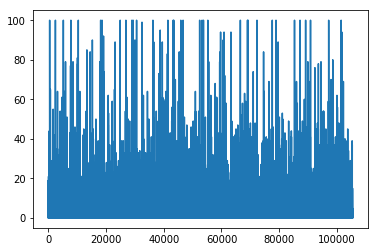

In [16]:
y=pd.DataFrame(y)
plt.plot(y)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_reduced = scaler.fit_transform(X_reduced)
y=scaler.fit_transform(y)

C:\Users\Jimei\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


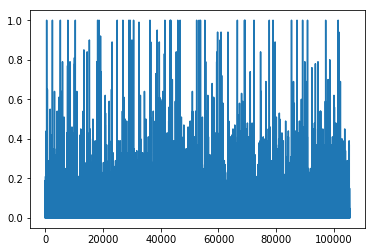

In [18]:
plt.plot(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y,test_size=0.3)

In [20]:
from keras.optimizers import Adam
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.callbacks import EarlyStopping
model = Sequential()
input = X_train.shape[1]
model.add(Dense(32, input_shape=(input,)))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam())
early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=2)
history = model.fit(X_train, y_train, epochs=20, batch_size=5, validation_data=(X_test, y_test), verbose=2, shuffle=False, callbacks=[early_stopping])# loss

C:\Users\Jimei\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 73829 samples, validate on 31642 samples
Epoch 1/20
 - 21s - loss: 0.0020 - val_loss: 0.0019
Epoch 2/20
 - 15s - loss: 0.0019 - val_loss: 0.0019
Epoch 3/20
 - 13s - loss: 0.0019 - val_loss: 0.0019
Epoch 4/20
 - 14s - loss: 0.0019 - val_loss: 0.0019
Epoch 5/20
 - 19s - loss: 0.0019 - val_loss: 0.0019
Epoch 6/20
 - 19s - loss: 0.0019 - val_loss: 0.0019
Epoch 7/20
 - 21s - loss: 0.0019 - val_loss: 0.0019
Epoch 8/20
 - 20s - loss: 0.0019 - val_loss: 0.0019
Epoch 9/20
 - 20s - loss: 0.0019 - val_loss: 0.0019
Epoch 10/20
 - 14s - loss: 0.0019 - val_loss: 0.0019
Epoch 11/20
 - 15s - loss: 0.0019 - val_loss: 0.0019
Epoch 12/20
 - 14s - loss: 0.0019 - val_loss: 0.0019
Epoch 13/20
 - 13s - loss: 0.0019 - val_loss: 0.0019
Epoch 14/20
 - 14s - loss: 0.0019 - val_loss: 0.0019
Epoch 15/20
 - 13s - loss: 0.0019 - val_loss: 0.0019
Epoch 16/20
 - 13s - loss: 0.0019 - val_loss: 0.0019
Epoch 17/20
 - 13s - loss: 0.0019 - val_loss: 0.0019
Epoch 18/20
 - 12s - loss: 0.0019 - val_loss: 0.0019
Epoch

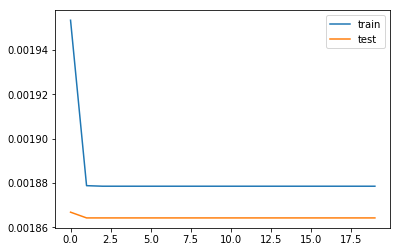

In [21]:
from matplotlib import pyplot
from math import sqrt
from numpy import concatenate
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.013821405027998026

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.0018642947263571759